In [0]:
!pip install qiskit ipywidgets

In [0]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

Creamos un circuito al que le vamos a realizar 8 medidas, va a tener 8 q-bits de entrada y 8 q-bits de salida

In [0]:
medidas = 8
qb_entrada = 8
qb_salida = 8
circuito = QuantumCircuit(qb_entrada,qb_salida)

Realizamos las mediciones de los q-bit

In [0]:
for j in range(medidas):
    circuito.measure(j,j)

Ya realizadas algunas mediciones, podemos ver un diagrama del circuito que realizamos

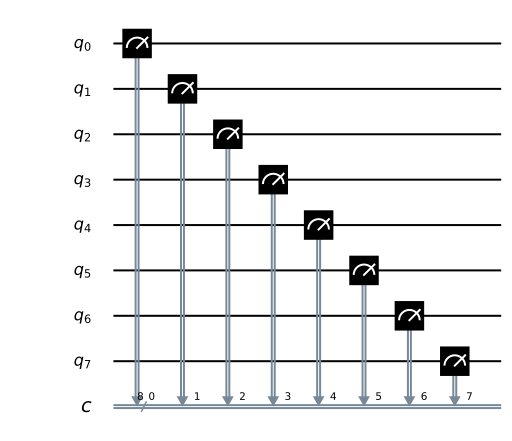

In [8]:
circuito.draw(output='mpl')

Los q-bits siempre se inicializan en 0, al no realizar nada cuántico, el resultado final será 00000000 con 100% de certeza, como se muestra a continuación, donde se ejecuta el circuito en un simulador cuántico

{'00000000': 1024}


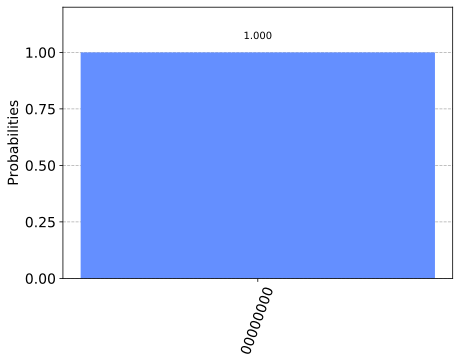

In [13]:
counts = execute(circuito,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Toda operación cuántica consta de 3 pasos:


*   Codificar las entradas.
*   Realizar las operaciones.
*   Extraer las salidas.






Las compuertas *NOT* son equivalentes a la operación *x*. Se crea una compuerta NOT en el octavo q-bit

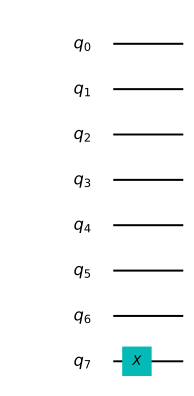

In [14]:
circuito_cod = QuantumCircuit(medidas)

circuito_cod.x(7)

circuito_cod.draw(output='mpl')

Se pueden fusionar los circutios con el operador sobrecargado "+", la operación no es conmutativa, sino que sigue el orden en como se concatenan.

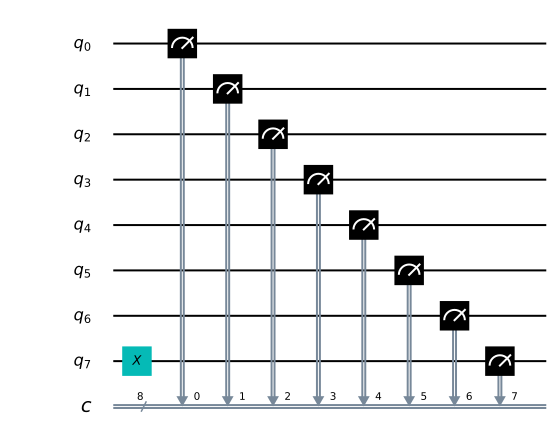

In [20]:
circuito_union = circuito_cod + circuito
circuito_union.draw(output='mpl',justify='none')

Ahora la salida será 10000000 (128 en binario) ya que el  octavo q-bit pasa de 0 a 1

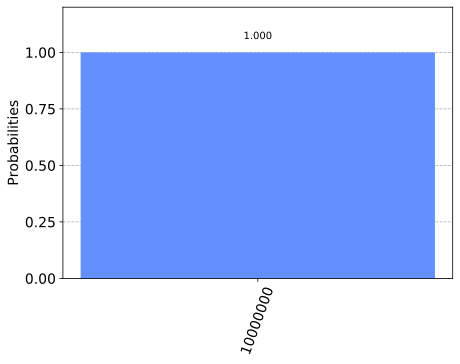

In [21]:
counts = execute(circuito_union,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

A continuación se crea un circuito que estará codificado con el número 00100010 (34)

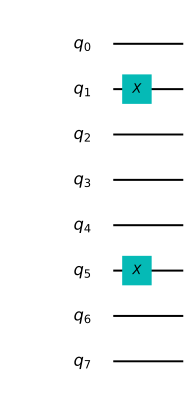

In [27]:
circuito_cod = QuantumCircuit(medidas)
circuito_cod.x(1)
circuito_cod.x(5)
circuito_cod.draw(output='mpl')

# Creando un sumador

Sean dos bits cualqueira:

0 + 0 = 00

0 + 1 = 01

1 + 0 = 01

1 + 1 = 10

Se puede ver que el bit más a la izquierda es 0 si los bits sumadores son iguales y uno si son diferentes, para detectar igualdad en bits se usa la compuerta *XOR* que en cuántica se traduce a la compuerta *controled-NOT* o *CNOT* denotada por cx.

La compuerta CNOT convierte el qubit al que llega en 0 si ambos bits son iguales y en 1 si ambos bit son diferentes.

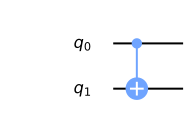

In [28]:
circuito_cnot = QuantumCircuit(2)
circuito_cnot.cx(0,1)
circuito_cnot.draw(output='mpl')

En el circuto inferiror entra 1 y 0, cnot es 1, lo que hace que q1=1, si se mide q0 se tiene invariable, así que el resultado final es 1 y 1

{'11': 1024}


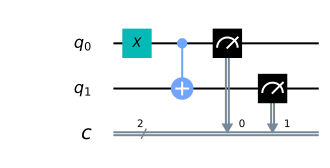

In [33]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)
qc.draw(output='mpl')

Cuando queremos sumar, no queremos sobreescribir el qubit, así que es mejor añadir otro donde se realice la operación

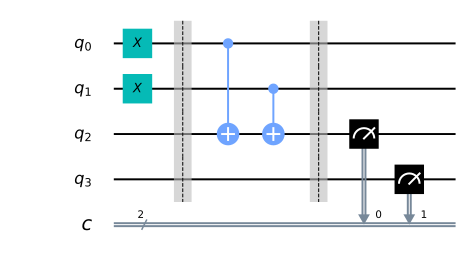

In [47]:
qc_ha = QuantumCircuit(4,2) #4 bits de entrada y 2 de salida
# codificacion
qc_ha.x(0) # a = 1
qc_ha.x(1) # b = 1
qc_ha.barrier() # linea punteada
#operacion
qc_ha.cx(0,2) # 0 cnot 2 = 1 cnot 0 = 1
qc_ha.cx(1,2) # 1 cnot 2 = 1 cnot 1  = 0 cnot 1 = 0
qc_ha.barrier()
# extraer salidas
qc_ha.measure(2,0) # resulado de la salida XOR 0
qc_ha.measure(3,1) # resultado en qubit 3 (no se ha tocado) = 0

#resultado extraído 00
# q0=q1=1,q2=q3=0

qc_ha.draw(output='mpl')

Repasando la suma solo hay un caso donde el segundo bit pasa a ser 1, que es el caso 1 + 1= 10, por lo tanto el bit 2 es igual a lo que en la computación normal sería una puerta *AND*, que devuelve 1 solamente cuando ambas entradas son 1. En cuántica la compuerta usada es una *Toffoli* que se comporta como una compuerta NOT, solamente cuando le entran 1, a su vez hace uso de 3 qubits, 2 de entrada y uno de salida. Se denota como una ccx.

A continuación se presenta el sumador medio de 1 bit.

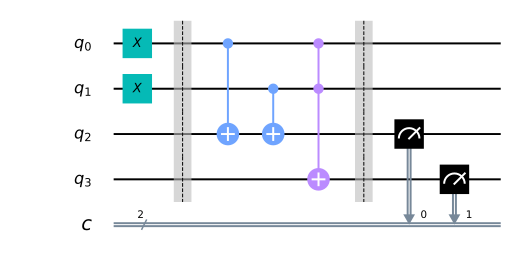

In [48]:
qc_ha = QuantumCircuit(4,2) #4 bits de entrada y 2 de salida
# codificacion
qc_ha.x(0) # a = 1
qc_ha.x(1) # b = 1
qc_ha.barrier() # linea punteada
#operacion
qc_ha.cx(0,2) # 0 cnot 2 = 1 cnot 0 = 1
qc_ha.cx(1,2) # 1 cnot 2 = 1 cnot 1  = 0 cnot 1 = 0
qc_ha.ccx(0,1,3) # 0  t 1 = 1  t 1 = not 3 = not 0 = 1
qc_ha.barrier()
# extraer salidas
qc_ha.measure(2,0) # resulado de la salida XOR 0
qc_ha.measure(3,1) # resultado del "AND" 1

#resultado extraído 10
# q0=q1=1,q2=q3=0

qc_ha.draw(output='mpl')

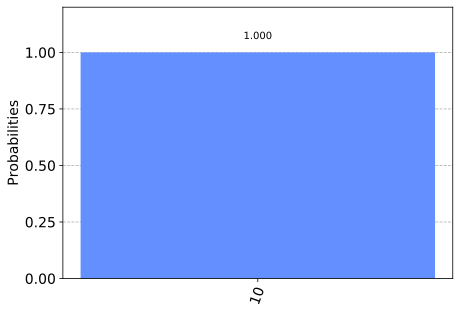

In [49]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)